In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'SOXL'
files = sorted(os.listdir(f'data/{symbol}'), key=lambda f: f'{f:>7}')


In [4]:
results = []
for f in files:
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_profits = df.call_end_price / df.call_start_price - 1
    mean_call_profit = call_profits.mean()
    annual_call_profit = (call_profits / df.TTL * 52).mean()
    positive_ratio = (call_profits > 0).mean()
    call_leverage = (df.call_strike_price / df.call_start_price).median()
    print(f'[{f:>7}] '
          f'mean profit: {mean_call_profit:+5.0%} '
          f'annual profit: {annual_call_profit:+6.0%} '
          f'positive: {positive_ratio:5.0%} '
          f'leverage: {call_leverage:4.1f} '
        #   f'daily tx: {df.call_daily_tx.median():4.0f} '
          f'transactions: {len(df):3d} ')
    results.append({
        'profit': mean_call_profit,
        'positive': positive_ratio,
    })

[ 1w.csv] mean profit:  +29% annual profit: +1522% positive:   35% leverage: 24.2 transactions: 102 
[ 2w.csv] mean profit:  +37% annual profit:  +962% positive:   39% leverage: 15.9 transactions: 101 
[ 3w.csv] mean profit:  +49% annual profit:  +842% positive:   40% leverage: 12.9 transactions: 100 
[ 4w.csv] mean profit:  +53% annual profit:  +692% positive:   41% leverage: 11.0 transactions:  99 
[ 5w.csv] mean profit:  +59% annual profit:  +610% positive:   43% leverage:  9.8 transactions:  97 
[ 6w.csv] mean profit:  +61% annual profit:  +530% positive:   44% leverage:  8.9 transactions:  94 
[ 7w.csv] mean profit:  +88% annual profit:  +651% positive:   50% leverage:  8.3 transactions:  56 
[ 8w.csv] mean profit:  +53% annual profit:  +344% positive:   50% leverage:  7.7 transactions:  22 
[ 9w.csv] mean profit:   +4% annual profit:   +25% positive:   38% leverage:  7.5 transactions:  16 
[10w.csv] mean profit:  +36% annual profit:  +185% positive:   40% leverage:  6.9 transacti

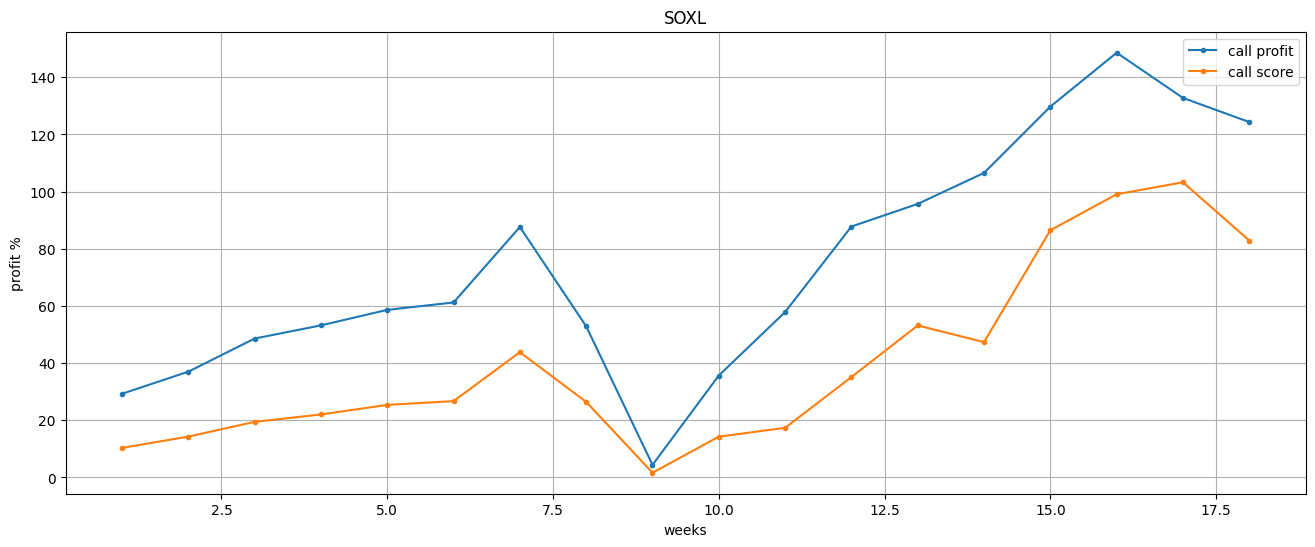

In [5]:
plt.figure(figsize=(16,6))
plt.plot([None]+[r['profit'] * 100 for r in results], label='call profit', marker='.')
plt.plot([None]+[r['profit'] * r['positive'] * 100 for r in results], label='call score', marker='.')
plt.legend(loc='best')
plt.title(symbol)
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

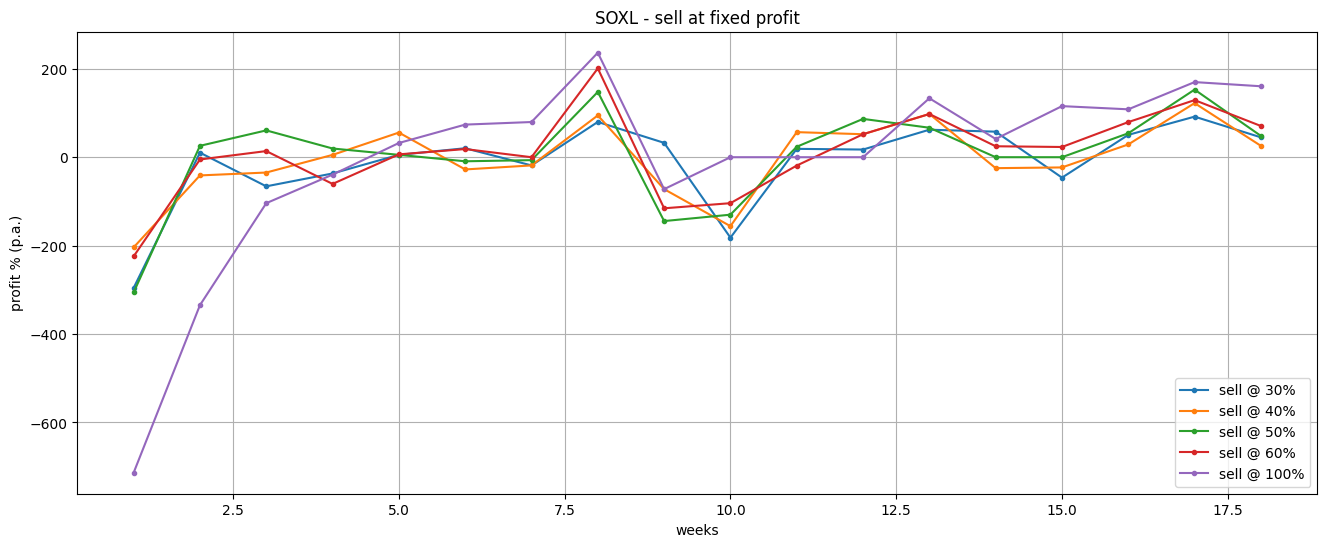

In [6]:
profit_thresholds = [0.3,0.4,0.5,0.6,1]
results = []
for f in files:
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_max_profits = df.call_max_price / df.call_start_price - 1
    weeks = df.TTL.median()
    r = {}
    for p in profit_thresholds:
        q = (call_max_profits >= p).mean()
        r[p] = (q * (p + 1) - 1) * 52 / weeks
    results.append(r)

plt.figure(figsize=(16,6))

for p in profit_thresholds:
    plt.plot([None]+[r[p] * 100 for r in results], label=f'sell @ {p:.0%}', marker='.')

plt.legend(loc='best')
plt.title(symbol + ' - sell at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit % (p.a.)')
plt.grid()
plt.show()

In [7]:
df = pd.read_csv(f'data/{symbol}/1w.csv')
df.start_date = pd.to_datetime(df.start_date)
df = df.set_index('start_date')
df['call_max_profit'] = df.call_max_price / df.call_start_price - 1
for p in [0.45,0.5,0.55,1]:
    q = (df['call_max_profit'] >= p).mean()
    profit = q * (p + 1) - 1
    print(f'sell @ {p:4.0%}: success rate {q:.0%} = profit: {profit:3.0%} ({profit*52:5.0%} p.a.)')

sell @  45%: success rate 64% = profit: -8% (-395% p.a.)
sell @  50%: success rate 63% = profit: -6% (-306% p.a.)
sell @  55%: success rate 60% = profit: -7% (-380% p.a.)
sell @ 100%: success rate 43% = profit: -14% (-714% p.a.)


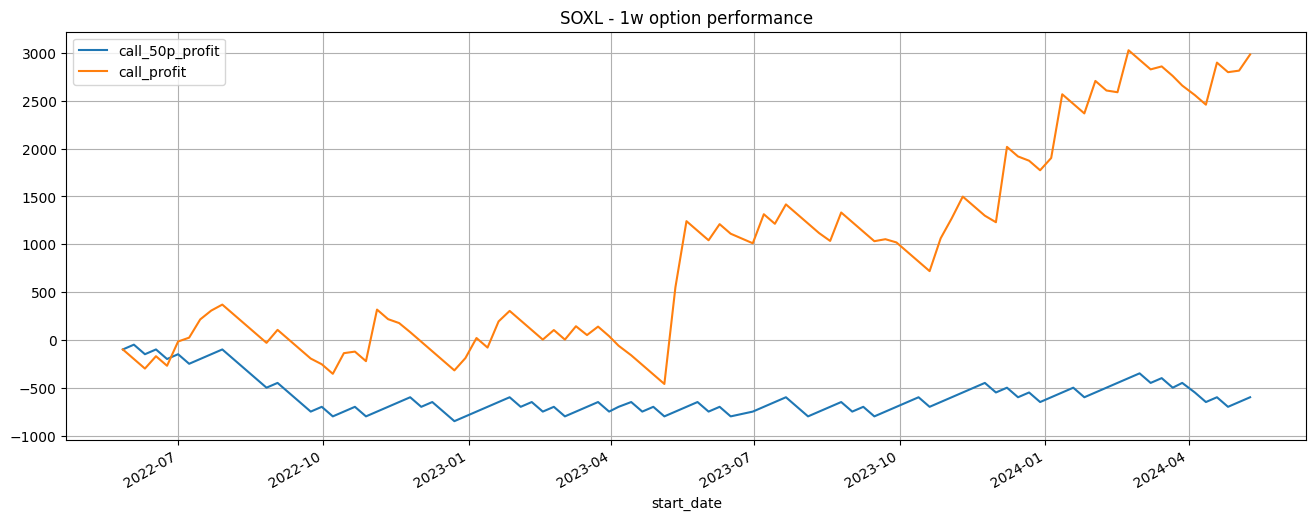

In [8]:

plt.figure(figsize=(16,6))
plt.title(symbol + ' - 1w option performance')

df['call_50p_profit'] = df.call_max_profit.apply(lambda x: 50 if x >= 0.5 else -100)
df.call_50p_profit.cumsum().plot()

df['call_profit'] = (df.call_end_price / df.call_start_price - 1) * 100
df.call_profit.cumsum().plot()

plt.legend(loc='best')
plt.grid()


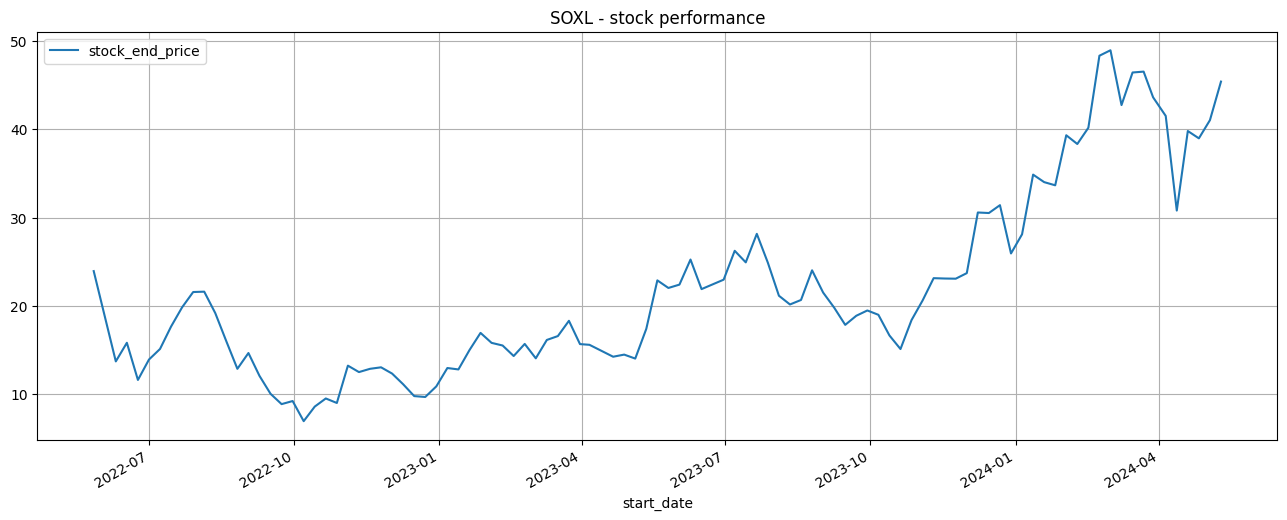

In [9]:
plt.figure(figsize=(16,6))
plt.title(symbol + ' - stock performance')
df.stock_end_price.plot()
plt.legend(loc='best')
plt.grid()